In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
!pip install -U scikit-learn imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

sns.set_style('darkgrid')

In [2]:
DATA_DIR = "/kaggle/input/olid-i/"

image_paths = []
extensions = ['*.JPG', '*.jpg', '*.png', '*.jpeg']
for ext in extensions:
    image_paths.extend(glob.glob(os.path.join(DATA_DIR, '*', ext)))

print(f"Found {len(image_paths)} image paths.")

data = []
for path in tqdm(image_paths):
    try:
        label = os.path.basename(os.path.dirname(path))
        data.append({'image_path': path, 'label': label})
    except Exception as e:
        print(f"Error processing {path}: {e}")

df = pd.DataFrame(data)

print("\nDataFrame Head:")
print(df.head())

print(f"\nSample Path: {df['image_path'].iloc[0]}")
print(f"Sample Label: {df['label'].iloc[0]}")

Found 4749 image paths.


  0%|          | 0/4749 [00:00<?, ?it/s]


DataFrame Head:
                                          image_path          label
0  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
1  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
2  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
3  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
4  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM

Sample Path: /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__PM (79).JPG
Sample Label: ash_gourd__PM


In [3]:
df.head()

image_path          label
0  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
1  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
2  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
3  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM
4  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM


--- Dataset Analysis ---
Total number of images: 4749
Total number of classes: 57

Class Distribution (Value Counts):
label
ash_gourd__N_K           386
ash_gourd__K             293
tomato__healthy          236
tomato__LM               207
snake_gourd__N_K         206
tomato__MIT              200
bitter_gourd__healthy    181
ridge_gourd__N           152
bitter_gourd__N          147
bitter_gourd__N_K        128
bitter_gourd__N_Mg       116
eggplant__K              106
eggplant__N_K            106
snake_gourd__N           102
bottle_gourd__N_K        102
eggplant__MIT_EB          95
eggplant__healthy         92
cucumber__N               89
ash_gourd__healthy        83
ridge_gourd__PLEI         80
ash_gourd__PM             79
cucumber__N_K             76
eggplant__MIT             75
eggplant__EB              74
ridge_gourd__healthy      70
eggplant__N               67
ash_gourd__N              61
snake_gourd__healthy      59
snake_gourd__K            56
bitter_gourd__K           55
ash_g

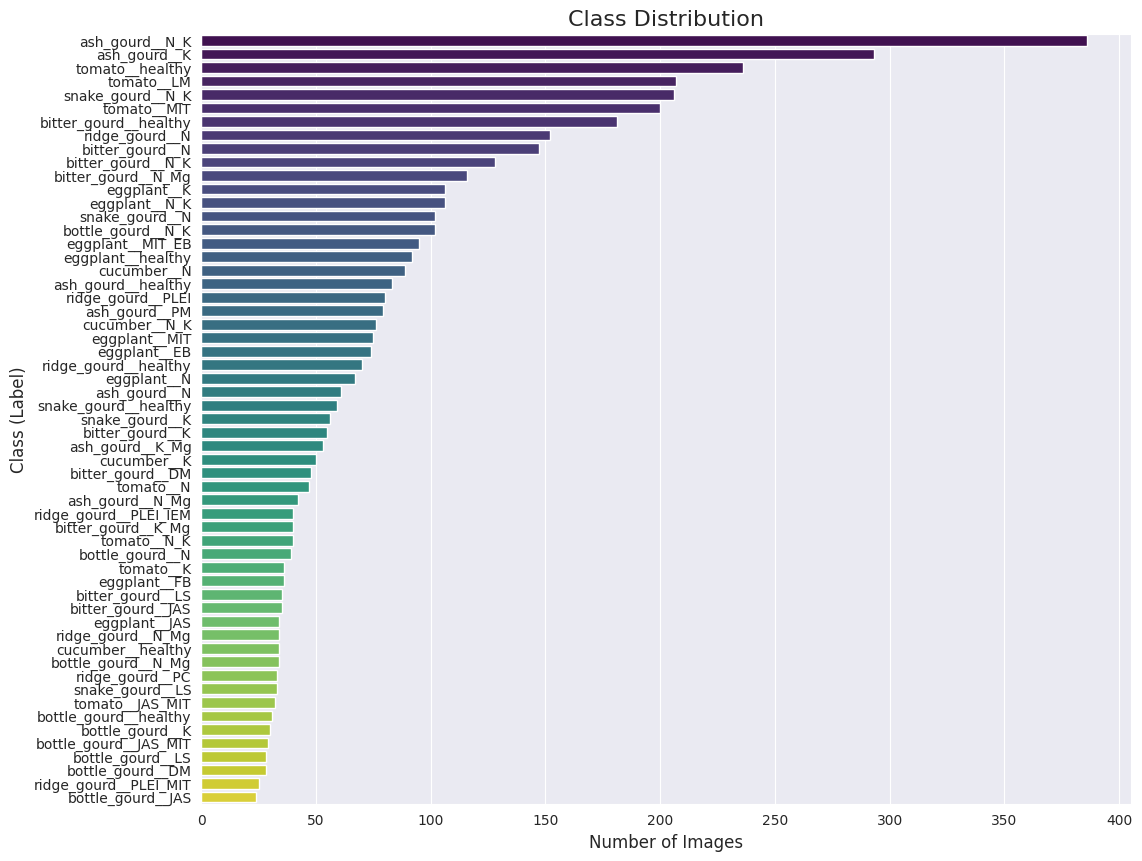

In [4]:
print("\n--- Dataset Analysis ---")
print(f"Total number of images: {len(df)}")
num_classes = df['label'].nunique()
print(f"Total number of classes: {num_classes}")

print("\nClass Distribution (Value Counts):")
print(df['label'].value_counts())

plt.figure(figsize=(12, 10))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='viridis')
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class (Label)', fontsize=12)
plt.show()


--- Single Image Inspection ---
Successfully read image: /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__PM (43).JPG
Image shape: (3024, 3024, 3)


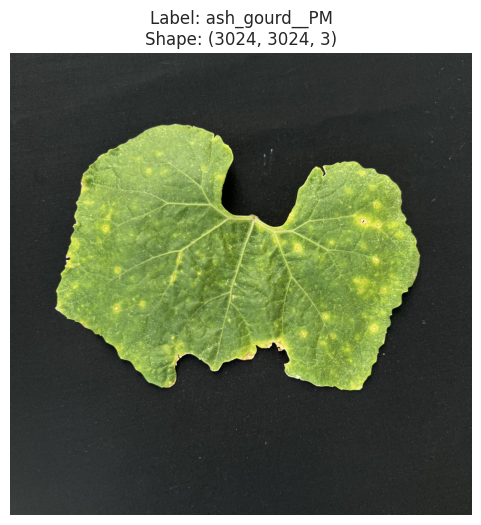


--- Grid of Sample Images ---


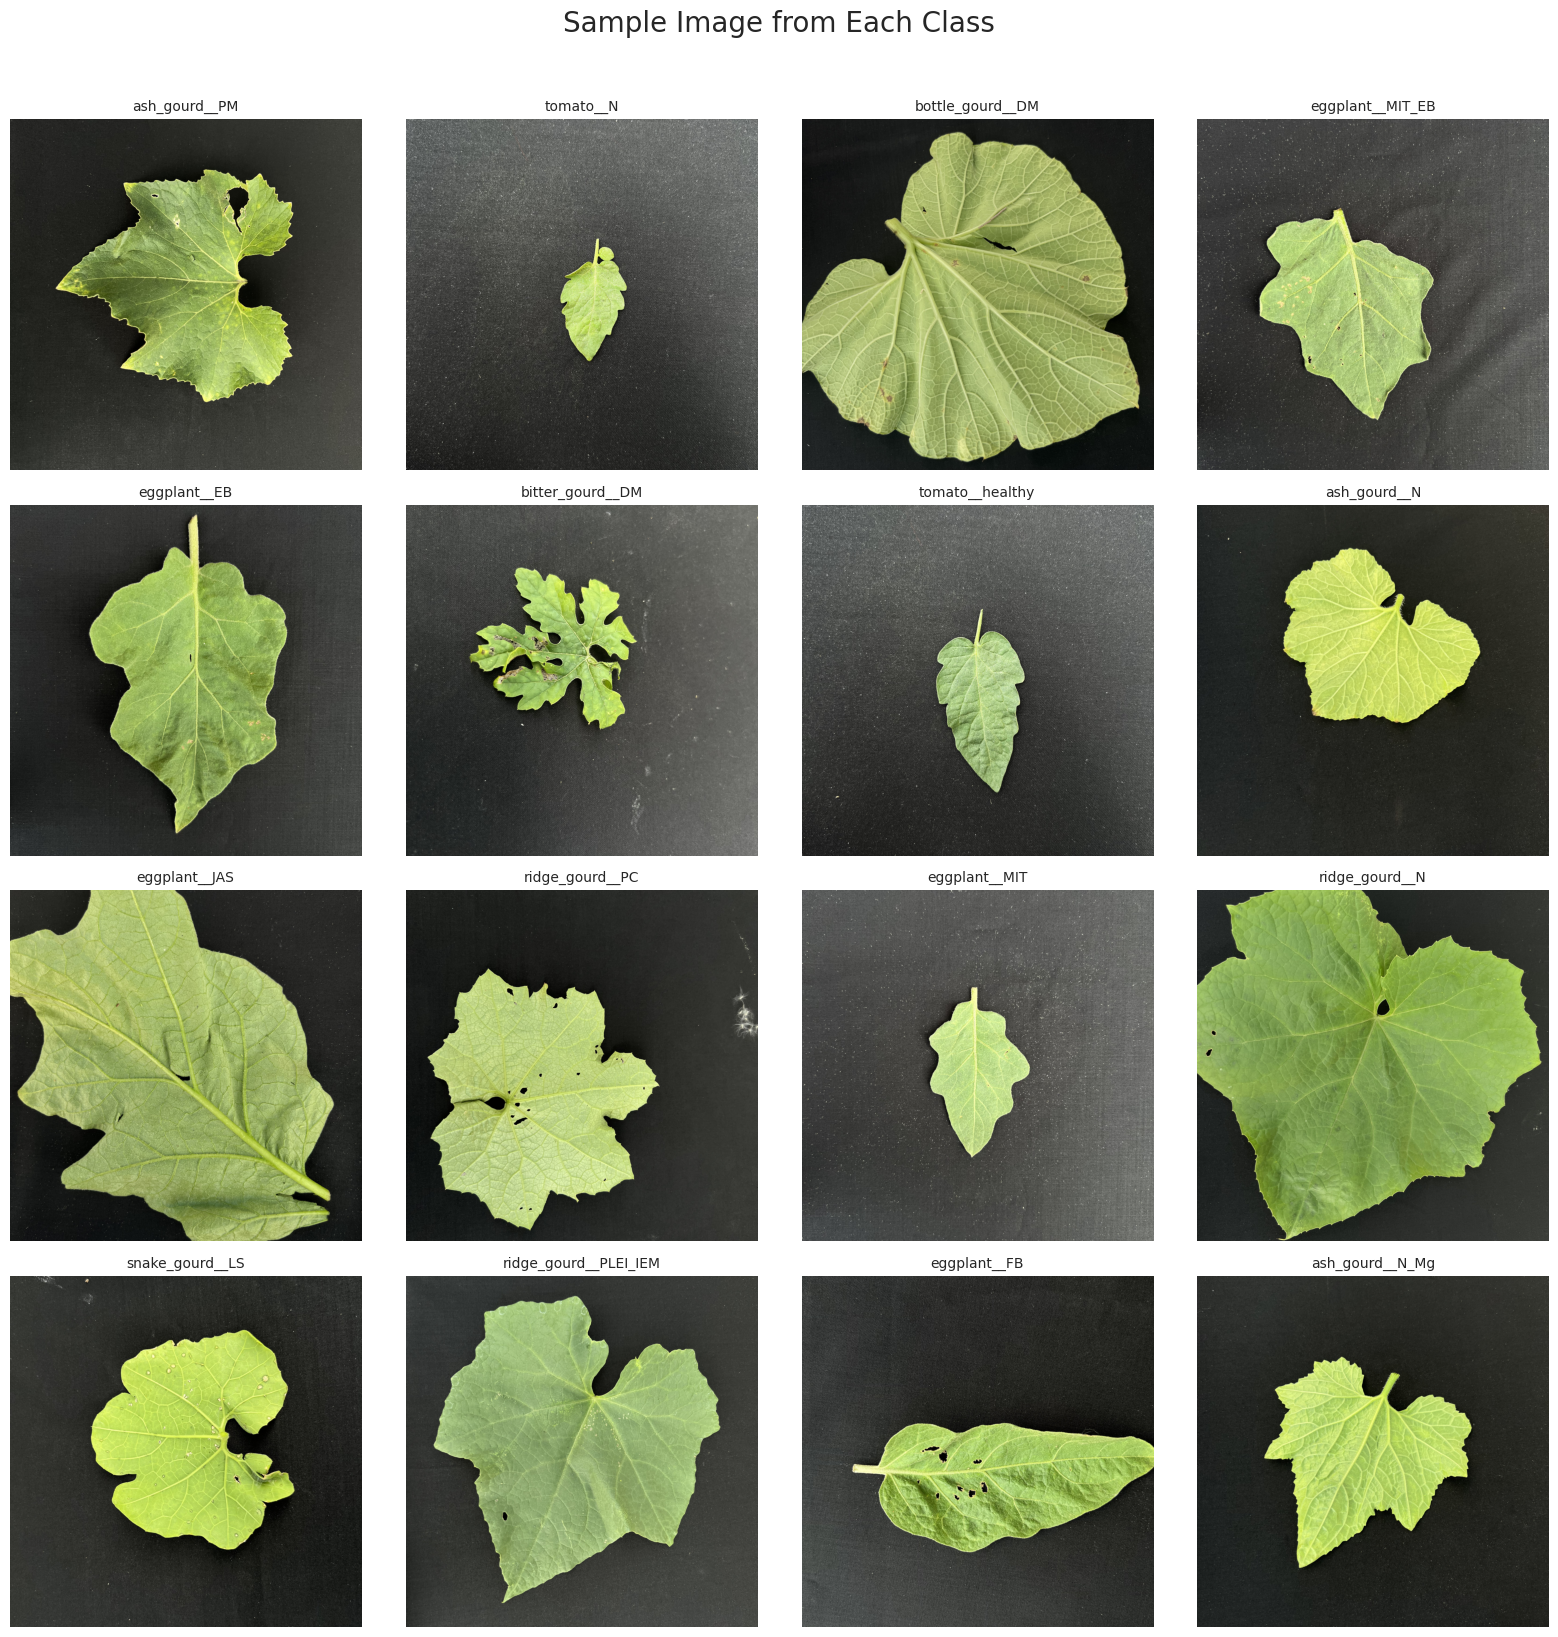

In [5]:
print("\n--- Single Image Inspection ---")
sample_row = df.iloc[5]
sample_path = sample_row['image_path']
sample_label = sample_row['label']

image_bgr = cv2.imread(sample_path)

if image_bgr is not None:
    print(f"Successfully read image: {sample_path}")
    
    print(f"Image shape: {image_bgr.shape}")

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.title(f"Label: {sample_label}\nShape: {image_bgr.shape}")
    plt.axis('off')
    plt.show()

else:
    print(f"Error: Could not read image at {sample_path}")

print("\n--- Grid of Sample Images ---")
unique_labels = df['label'].unique()

grid_size = min(num_classes, 16) 
cols = 4
rows = int(np.ceil(grid_size / cols))

plt.figure(figsize=(cols * 4, rows * 4))
for i, label in enumerate(unique_labels[:grid_size]):
    path = df[df['label'] == label].sample(1)['image_path'].values[0]
    
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_rgb)
    plt.title(label, fontsize=10)
    plt.axis('off')

plt.suptitle("Sample Image from Each Class", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [6]:
df[['plant_type', 'status']] = df['label'].str.split('__', n=1, expand=True)

print("--- Before Filtering ---")
print(f"Original number of images: {len(df)}")
print(f"Original number of classes: {df['label'].nunique()}")

df_filtered = df[~df['status'].str.contains('_')].copy()

print("\n--- After Filtering ---")
print(f"Dropped {len(df) - len(df_filtered)} images with composite labels.")
print(f"New total number of images: {len(df_filtered)}")
print(f"New total number of classes: {df_filtered['label'].nunique()}")

dropped_labels = set(df['label']) - set(df_filtered['label'])
print(f"\nExample labels that were dropped:\n{list(dropped_labels)[:5]}")

--- Before Filtering ---
Original number of images: 4749
Original number of classes: 57

--- After Filtering ---
Dropped 1584 images with composite labels.
New total number of images: 3165
New total number of classes: 39

Example labels that were dropped:
['cucumber__N_K', 'bottle_gourd__JAS_MIT', 'ridge_gourd__PLEI_IEM', 'bitter_gourd__K_Mg', 'ridge_gourd__PLEI_MIT']


In [7]:
df_filtered["label"].unique()

array(['ash_gourd__PM', 'tomato__N', 'bottle_gourd__DM', 'eggplant__EB',
       'bitter_gourd__DM', 'tomato__healthy', 'ash_gourd__N',
       'eggplant__JAS', 'ridge_gourd__PC', 'eggplant__MIT',
       'ridge_gourd__N', 'snake_gourd__LS', 'eggplant__FB',
       'ridge_gourd__healthy', 'bitter_gourd__K', 'bottle_gourd__JAS',
       'snake_gourd__N', 'ash_gourd__healthy', 'snake_gourd__healthy',
       'cucumber__K', 'cucumber__N', 'ash_gourd__K', 'bottle_gourd__K',
       'bottle_gourd__LS', 'bottle_gourd__healthy', 'tomato__K',
       'cucumber__healthy', 'bitter_gourd__LS', 'snake_gourd__K',
       'bitter_gourd__JAS', 'tomato__LM', 'ridge_gourd__PLEI',
       'bitter_gourd__N', 'bottle_gourd__N', 'eggplant__K', 'tomato__MIT',
       'eggplant__N', 'eggplant__healthy', 'bitter_gourd__healthy'],
      dtype=object)


--- New Class Distribution ---
label
ash_gourd__K             293
tomato__healthy          236
tomato__LM               207
tomato__MIT              200
bitter_gourd__healthy    181
ridge_gourd__N           152
bitter_gourd__N          147
eggplant__K              106
snake_gourd__N           102
eggplant__healthy         92
cucumber__N               89
ash_gourd__healthy        83
ridge_gourd__PLEI         80
ash_gourd__PM             79
eggplant__MIT             75
eggplant__EB              74
ridge_gourd__healthy      70
eggplant__N               67
ash_gourd__N              61
snake_gourd__healthy      59
snake_gourd__K            56
bitter_gourd__K           55
cucumber__K               50
bitter_gourd__DM          48
tomato__N                 47
bottle_gourd__N           39
tomato__K                 36
eggplant__FB              36
bitter_gourd__LS          35
bitter_gourd__JAS         35
eggplant__JAS             34
cucumber__healthy         34
ridge_gourd__PC           33
snake

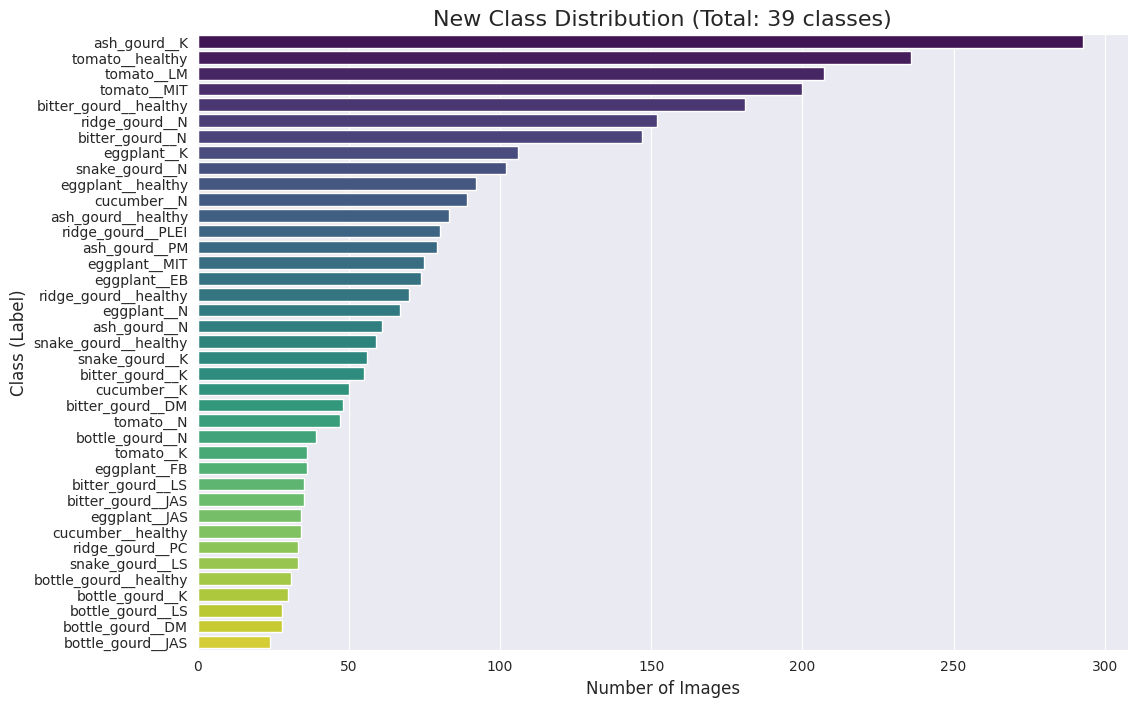

In [8]:
print("\n--- New Class Distribution ---")
print(df_filtered['label'].value_counts())

plt.figure(figsize=(12, 8))
num_new_classes = df_filtered['label'].nunique()
sns.countplot(
    y='label', 
    data=df_filtered, 
    order=df_filtered['label'].value_counts().index, 
    palette='viridis'
)
plt.title(f'New Class Distribution (Total: {num_new_classes} classes)', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class (Label)', fontsize=12)
plt.show()

In [9]:
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern, hog
from skimage.color import rgb2gray
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm

tqdm.pandas(desc="Processing Images")

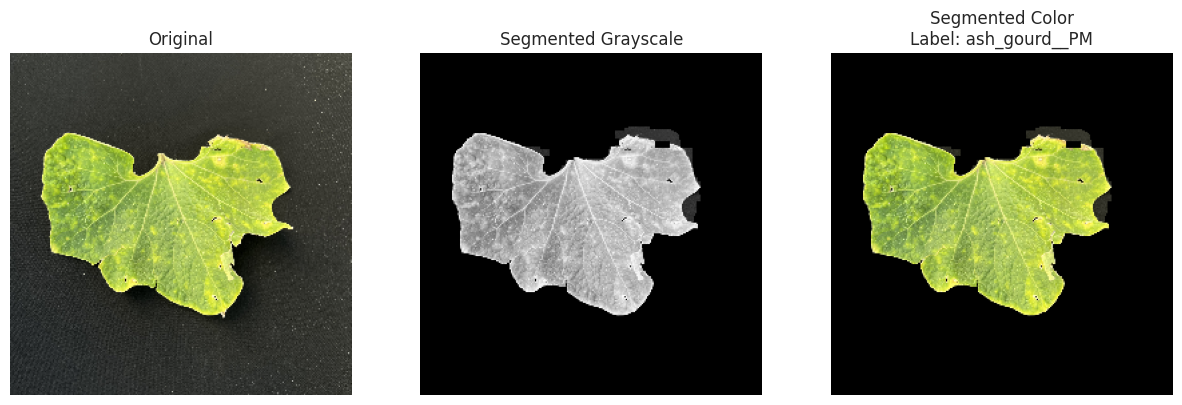

In [10]:
IMG_SIZE = 256 

def preprocess_and_segment(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        lower_green = np.array([25, 40, 40])
        upper_green = np.array([85, 255, 255]) 
        
        mask = cv2.inRange(hsv_img, lower_green, upper_green)

        kernel = np.ones((3, 3), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
        
        segmented_color = cv2.bitwise_and(img, img, mask=mask)

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        segmented_gray = cv2.bitwise_and(gray_img, gray_img, mask=mask)
        
        return segmented_color, segmented_gray

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8), \
               np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)

sample_path = df_filtered['image_path'].iloc[0]
sample_label = df_filtered['label'].iloc[0]

segmented_color, segmented_gray = preprocess_and_segment(sample_path)

original_img = cv2.imread(sample_path)
original_img = cv2.resize(original_img, (IMG_SIZE, IMG_SIZE))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(segmented_gray, cmap='gray')
axes[1].set_title("Segmented Grayscale")
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(segmented_color, cv2.COLOR_BGR2RGB))
axes[2].set_title(f"Segmented Color\nLabel: {sample_label}")
axes[2].axis('off')

plt.show()

In [11]:
def extract_color_features(segmented_color):
    """Calculates a 3D HSV color histogram."""
    hsv = cv2.cvtColor(segmented_color, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 12, 3], [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def extract_texture_features(segmented_gray):
    """Calculates GLCM and LBP texture features."""
    glcm = graycomatrix(segmented_gray, 
                        distances=[5], 
                        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], 
                        levels=256,
                        symmetric=True, 
                        normed=True)
    
    contrast = graycoprops(glcm, 'contrast').flatten()
    dissimilarity = graycoprops(glcm, 'dissimilarity').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    correlation = graycoprops(glcm, 'correlation').flatten()
    
    glcm_features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation])
    
    n_points = 24 
    radius = 8
    lbp = local_binary_pattern(segmented_gray, n_points, radius, method='uniform')
    
    (lbp_hist, _) = np.histogram(lbp.ravel(),
                                 bins=np.arange(0, n_points + 3),
                                 range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    
    return np.hstack([glcm_features, lbp_hist])

def extract_shape_features(segmented_gray):
    """Calculates Histogram of Oriented Gradients (HOG) features."""
    hog_features = hog(segmented_gray, 
                       orientations=9, 
                       pixels_per_cell=(16, 16),
                       cells_per_block=(2, 2), 
                       transform_sqrt=True, 
                       block_norm='L2-Hys',
                       feature_vector=True)
    return hog_features

In [12]:
def create_feature_vector(image_path):
    segmented_color, segmented_gray = preprocess_and_segment(image_path)
    
    if np.max(segmented_color) == 0:
        print(f"Segmentation failed for {image_path}. Skipping.")
        return np.zeros(2098) 

    color_features = extract_color_features(segmented_color)
    
    texture_features = extract_texture_features(segmented_gray)
    
    shape_features = hog(segmented_gray, 
                       orientations=9, 
                       pixels_per_cell=(32, 32),
                       cells_per_block=(2, 2), 
                       transform_sqrt=True, 
                       block_norm='L2-Hys',
                       feature_vector=True)

    return np.hstack([color_features, texture_features, shape_features])

In [14]:
df_filtered['features'] = df_filtered['image_path'].progress_apply(create_feature_vector)

plant_encoder = LabelEncoder()
df_filtered['plant_type_encoded'] = plant_encoder.fit_transform(df_filtered['plant_type'])

X_images = np.stack(df_filtered['features'].values)

X_plant_type = df_filtered['plant_type_encoded'].values.reshape(-1, 1) 

X = np.hstack([X_images, X_plant_type])

y_labels = df_filtered['label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

print("\n--- Dataset Build Complete ---")
print(f"X (feature matrix) shape: {X.shape}")
print(f"y (target vector) shape: {y.shape}")
print(f"\nNumber of features per image: {X_images.shape[1]}")
print(f"Number of 'plant_type' features: {X_plant_type.shape[1]}")
print(f"Total features: {X.shape[1]}")
df_filtered.to_csv('/kaggle/working/output.csv', index=False)
np.save('/kaggle/working/X_matrix.npy', X)

print("\nSaved Label Encoder classes:")
print(label_encoder.classes_)

Processing Images:   0%|          | 0/3165 [00:00<?, ?it/s]


--- Dataset Build Complete ---
X (feature matrix) shape: (3165, 2099)
y (target vector) shape: (3165,)

Number of features per image: 2098
Number of 'plant_type' features: 1
Total features: 2099

Saved Label Encoder classes:
['ash_gourd__K' 'ash_gourd__N' 'ash_gourd__PM' 'ash_gourd__healthy'
 'bitter_gourd__DM' 'bitter_gourd__JAS' 'bitter_gourd__K'
 'bitter_gourd__LS' 'bitter_gourd__N' 'bitter_gourd__healthy'
 'bottle_gourd__DM' 'bottle_gourd__JAS' 'bottle_gourd__K'
 'bottle_gourd__LS' 'bottle_gourd__N' 'bottle_gourd__healthy'
 'cucumber__K' 'cucumber__N' 'cucumber__healthy' 'eggplant__EB'
 'eggplant__FB' 'eggplant__JAS' 'eggplant__K' 'eggplant__MIT'
 'eggplant__N' 'eggplant__healthy' 'ridge_gourd__N' 'ridge_gourd__PC'
 'ridge_gourd__PLEI' 'ridge_gourd__healthy' 'snake_gourd__K'
 'snake_gourd__LS' 'snake_gourd__N' 'snake_gourd__healthy' 'tomato__K'
 'tomato__LM' 'tomato__MIT' 'tomato__N' 'tomato__healthy']


In [15]:
df_filtered.head(5)

image_path          label  \
0  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   
1  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   
2  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   
3  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   
4  /kaggle/input/olid-i/ash_gourd__PM/ash_gourd__...  ash_gourd__PM   

  plant_type status                                           features  \
0  ash_gourd     PM  [0.9880375862121582, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  ash_gourd     PM  [0.9831855893135071, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  ash_gourd     PM  [0.8149399161338806, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  ash_gourd     PM  [0.9427210092544556, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  ash_gourd     PM  [0.9558024406433105, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

   plant_type_encoded  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import time

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaling complete.")

X_train shape: (2373, 2099)
X_test shape: (792, 2099)

Scaling complete.


In [ ]:
print("\n--- Training Model (Option A: Class Weighting) ---")

svc_weighted = SVC(kernel='rbf', C=10, gamma='auto', class_weight='balanced', random_state=42)

start_time = time.time()
svc_weighted.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"Training took {end_time - start_time:.2f} seconds.")

print("\n--- Evaluation (Option A) ---")
y_pred_weighted = svc_weighted.predict(X_test_scaled)

print(f"Overall Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")

print("\nClassification Report (Weighted):")
print(classification_report(y_test, y_pred_weighted, target_names=label_encoder.classes_))

In [ ]:
print("\n--- Training Model (Option B: SMOTE Resampling) ---")
start_time = time.time()

min_class_size = pd.Series(y_train).value_counts().min()
smote_k = max(1, min(5, min_class_size - 1))

if smote_k > 0:
    print(f"Applying SMOTE with k_neighbors={smote_k}...")
    smote = SMOTE(random_state=42, k_neighbors=smote_k)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    print(f"Original training shape: {X_train_scaled.shape}")
    print(f"Resampled training shape: {X_train_resampled.shape}")
else:
    print("A class in the training set has only 1 sample. Skipping SMOTE.")
    X_train_resampled, y_train_resampled = X_train_scaled, y_train
    
end_time = time.time()
print(f"SMOTE took {end_time - start_time:.2f} seconds.")


svc_smote = SVC(kernel='rbf', C=10, gamma='auto', random_state=42)

start_time = time.time()
svc_smote.fit(X_train_resampled, y_train_resampled)
end_time = time.time()
print(f"Training on SMOTE data took {end_time - start_time:.2f} seconds.")

print("\n--- Evaluation (Option B) ---")
y_pred_smote = svc_smote.predict(X_test_scaled)

print(f"Overall Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")

print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote, target_names=label_encoder.classes_))

In [ ]:
print("\n--- Hyperparameter Tuning with GridSearchCV ---")

param_grid = {
    'C': [1, 10, 50],
    'gamma': [0.01, 0.001, 'auto']
}

grid_search = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced', random_state=42), 
    param_grid, 
    cv=3, 
    n_jobs=-1, 
    verbose=2 
)

print("Starting GridSearch... This may take 10-20 minutes or more.")
grid_search.fit(X_train_scaled, y_train) 

print("\nGridSearch Complete.")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

print("\n--- Final Evaluation (Tuned Model) ---")
y_pred_best = best_model.predict(X_test_scaled)
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

print("\nPlotting Confusion Matrix for best model...")
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=False, fmt='d', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix', fontsize=20)
plt.ylabel('Actual Label', fontsize=15)
plt.xlabel('Predicted Label', fontsize=15)
plt.show()

In [17]:
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import LinearSVC

X = np.load('X_matrix.npy') 
df_filtered = pd.read_csv('output.csv')


print("--- 1. Creating Multi-Output Targets (y) ---")

plant_encoder_multi = LabelEncoder()
status_encoder_multi = LabelEncoder()

y_plant = plant_encoder_multi.fit_transform(df_filtered['plant_type'])
y_status = status_encoder_multi.fit_transform(df_filtered['status'])

y_multi = np.stack([y_plant, y_status], axis=1)

print(f"X shape: {X.shape}")
print(f"y_multi shape: {y_multi.shape}")

X_train, X_test, y_train_multi, y_test_multi = train_test_split(
    X, y_multi,
    test_size=0.25,
    random_state=42,
    stratify=y_plant 
)

print("\n--- 2. Scaling Features ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def evaluate_multi_output(y_true, y_pred, model_name):
    print(f"\n--- EVALUATION: {model_name} ---")
    
    y_true_plant = y_true[:, 0]
    y_true_status = y_true[:, 1]
    
    y_pred_plant = y_pred[:, 0]
    y_pred_status = y_pred[:, 1]
    
    print("\n--- Target 1: Plant Type ---")
    print(f"Accuracy: {accuracy_score(y_true_plant, y_pred_plant):.4f}")
    print(classification_report(
        y_true_plant, 
        y_pred_plant, 
        target_names=plant_encoder_multi.classes_
    ))
    
    print("\n--- Target 2: Status (Disease/Deficiency) ---")
    print(f"Accuracy: {accuracy_score(y_true_status, y_pred_status):.4f}")
    print(f"Macro F1 (most important): {f1_score(y_true_status, y_pred_status, average='macro'):.4f}")
    print(classification_report(
        y_true_status, 
        y_pred_status, 
        target_names=status_encoder_multi.classes_,
        zero_division=0 
    ))

print("\nSetup complete. You are ready to train models.")

--- 1. Creating Multi-Output Targets (y) ---
X shape: (3165, 2099)
y_multi shape: (3165, 2)

--- 2. Scaling Features ---

Setup complete. You are ready to train models.


# Classical ML Models (No PCA)

In [18]:
print("--- Training Model 1: K-Nearest Neighbors (KNN) ---")
start_time = time.time()

knn_model = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn_model.fit(X_train_scaled, y_train_multi)

end_time = time.time()
print(f"Training took {end_time - start_time:.2f} seconds.")

y_pred_knn = knn_model.predict(X_test_scaled)
evaluate_multi_output(y_test_multi, y_pred_knn, "K-Nearest Neighbors")

--- Training Model 1: K-Nearest Neighbors (KNN) ---
Training took 0.01 seconds.

--- EVALUATION: K-Nearest Neighbors ---

--- Target 1: Plant Type ---
Accuracy: 0.7891
              precision    recall  f1-score   support

   ash_gourd       0.75      0.91      0.82       129
bitter_gourd       0.89      0.94      0.92       125
bottle_gourd       0.59      0.49      0.54        45
    cucumber       0.58      0.67      0.62        43
    eggplant       0.83      0.66      0.74       121
 ridge_gourd       0.71      0.81      0.76        84
 snake_gourd       0.79      0.30      0.44        63
      tomato       0.85      0.95      0.90       182

    accuracy                           0.79       792
   macro avg       0.75      0.72      0.72       792
weighted avg       0.79      0.79      0.78       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.4811
Macro F1 (most important): 0.3249
              precision    recall  f1-score   support

          DM       0.18     

In [19]:
y_pred_knn = knn_model.predict(X_train_scaled)
evaluate_multi_output(y_train_multi, y_pred_knn, "K-Nearest Neighbors")


--- EVALUATION: K-Nearest Neighbors ---

--- Target 1: Plant Type ---
Accuracy: 0.8500
              precision    recall  f1-score   support

   ash_gourd       0.82      0.94      0.87       387
bitter_gourd       0.93      0.97      0.95       376
bottle_gourd       0.80      0.69      0.74       135
    cucumber       0.71      0.76      0.73       130
    eggplant       0.88      0.78      0.82       363
 ridge_gourd       0.77      0.84      0.80       251
 snake_gourd       0.88      0.45      0.60       187
      tomato       0.88      0.96      0.92       544

    accuracy                           0.85      2373
   macro avg       0.83      0.80      0.80      2373
weighted avg       0.85      0.85      0.84      2373


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.5908
Macro F1 (most important): 0.4775
              precision    recall  f1-score   support

          DM       0.47      0.26      0.34        57
          EB       0.68      0.53      0.60        53


In [20]:
print("--- Training Model 2: Logistic Regression ---")
start_time = time.time()

log_reg = LogisticRegression(solver='liblinear', random_state=42)
multi_log_reg = MultiOutputClassifier(log_reg, n_jobs=-1)

multi_log_reg.fit(X_train_scaled, y_train_multi)

end_time = time.time()
print(f"Training took {end_time - start_time:.2f} seconds.")

y_pred_log = multi_log_reg.predict(X_test_scaled)
evaluate_multi_output(y_test_multi, y_pred_log, "Logistic Regression")

--- Training Model 2: Logistic Regression ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Training took 84.32 seconds.

--- EVALUATION: Logistic Regression ---

--- Target 1: Plant Type ---
Accuracy: 0.9230
              precision    recall  f1-score   support

   ash_gourd       0.92      0.97      0.94       129
bitter_gourd       0.98      0.99      0.98       125
bottle_gourd       0.78      0.69      0.73        45
    cucumber       0.98      0.93      0.95        43
    eggplant       0.92      0.83      0.87       121
 ridge_gourd       0.87      0.86      0.86        84
 snake_gourd       0.92      0.90      0.91        63
      tomato       0.94      0.99      0.97       182

    accuracy                           0.92       792
   macro avg       0.91      0.90      0.90       792
weighted avg       0.92      0.92      0.92       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.5013
Macro F1 (most important): 0.4222
              precision    recall  f1-score   support

          DM       0.22      0.11      0.14        19
          EB       0.48  

In [21]:
y_pred_log = multi_log_reg.predict(X_train_scaled)
evaluate_multi_output(y_train_multi, y_pred_log, "Logistic Regression")


--- EVALUATION: Logistic Regression ---

--- Target 1: Plant Type ---
Accuracy: 1.0000
              precision    recall  f1-score   support

   ash_gourd       1.00      1.00      1.00       387
bitter_gourd       1.00      1.00      1.00       376
bottle_gourd       1.00      1.00      1.00       135
    cucumber       1.00      1.00      1.00       130
    eggplant       1.00      1.00      1.00       363
 ridge_gourd       1.00      1.00      1.00       251
 snake_gourd       1.00      1.00      1.00       187
      tomato       1.00      1.00      1.00       544

    accuracy                           1.00      2373
   macro avg       1.00      1.00      1.00      2373
weighted avg       1.00      1.00      1.00      2373


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.9992
Macro F1 (most important): 0.9996
              precision    recall  f1-score   support

          DM       1.00      1.00      1.00        57
          EB       1.00      1.00      1.00        53


In [24]:
print("--- Training Model 3: Decision Tree ---")
start_time = time.time()

dt_model = DecisionTreeClassifier(
    class_weight='balanced', 
    random_state=42
)
dt_model.fit(X_train_scaled, y_train_multi)

end_time = time.time()
print(f"Training took {end_time - start_time:.2f} seconds.")

y_pred_dt = dt_model.predict(X_test_scaled)
evaluate_multi_output(y_test_multi, y_pred_dt, "Decision Tree (Weighted)")

print("Train data accuracy below: \n")

y_pred_dt = dt_model.predict(X_train_scaled)
evaluate_multi_output(y_train_multi, y_pred_dt, "Decision Tree (Weighted)")

--- Training Model 3: Decision Tree ---
Training took 6.80 seconds.

--- EVALUATION: Decision Tree (Weighted) ---

--- Target 1: Plant Type ---
Accuracy: 1.0000
              precision    recall  f1-score   support

   ash_gourd       1.00      1.00      1.00       129
bitter_gourd       1.00      1.00      1.00       125
bottle_gourd       1.00      1.00      1.00        45
    cucumber       1.00      1.00      1.00        43
    eggplant       1.00      1.00      1.00       121
 ridge_gourd       1.00      1.00      1.00        84
 snake_gourd       1.00      1.00      1.00        63
      tomato       1.00      1.00      1.00       182

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.5051
Macro F1 (most important): 0.4471
              precision    recall  f1-score   support

          DM       0.19      0.16  

In [26]:
print("--- Training Model 4: Random Forest ---")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train_multi)

end_time = time.time()
print(f"Training took {end_time - start_time:.2f} seconds.")

y_pred_rf = rf_model.predict(X_test_scaled)
evaluate_multi_output(y_test_multi, y_pred_rf, "Random Forest (Weighted)")

print("Train data accuracy below: \n")

y_pred_rf = rf_model.predict(X_train_scaled)
evaluate_multi_output(y_train_multi, y_pred_rf, "Random Forest (Weighted)")

--- Training Model 4: Random Forest ---
Training took 3.72 seconds.

--- EVALUATION: Random Forest (Weighted) ---

--- Target 1: Plant Type ---
Accuracy: 0.9104
              precision    recall  f1-score   support

   ash_gourd       0.87      0.95      0.91       129
bitter_gourd       0.98      1.00      0.99       125
bottle_gourd       0.96      0.60      0.74        45
    cucumber       0.97      0.86      0.91        43
    eggplant       0.84      0.84      0.84       121
 ridge_gourd       0.87      0.90      0.89        84
 snake_gourd       0.96      0.86      0.91        63
      tomato       0.93      0.97      0.95       182

    accuracy                           0.91       792
   macro avg       0.92      0.87      0.89       792
weighted avg       0.91      0.91      0.91       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.5606
Macro F1 (most important): 0.3885
              precision    recall  f1-score   support

          DM       0.50      0.05  

In [27]:
print("--- Training Model 5: AdaBoost ---")
start_time = time.time()

base_estimator = DecisionTreeClassifier(max_depth=2, random_state=42)

ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    random_state=42
)

multi_ada_model = MultiOutputClassifier(ada_model, n_jobs=-1)
multi_ada_model.fit(X_train_scaled, y_train_multi)

end_time = time.time()
print(f"Training took {end_time - start_time:.2f} seconds.")

y_pred_ada = multi_ada_model.predict(X_test_scaled)
evaluate_multi_output(y_test_multi, y_pred_ada, "AdaBoost")

--- Training Model 5: AdaBoost ---
Training took 60.39 seconds.

--- EVALUATION: AdaBoost ---

--- Target 1: Plant Type ---
Accuracy: 0.9457
              precision    recall  f1-score   support

   ash_gourd       1.00      1.00      1.00       129
bitter_gourd       1.00      1.00      1.00       125
bottle_gourd       1.00      1.00      1.00        45
    cucumber       0.00      0.00      0.00        43
    eggplant       0.74      1.00      0.85       121
 ridge_gourd       1.00      1.00      1.00        84
 snake_gourd       1.00      1.00      1.00        63
      tomato       1.00      1.00      1.00       182

    accuracy                           0.95       792
   macro avg       0.84      0.88      0.86       792
weighted avg       0.91      0.95      0.92       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.4924
Macro F1 (most important): 0.3589
              precision    recall  f1-score   support

          DM       0.20      0.05      0.08        19
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [28]:
y_pred_ada = multi_ada_model.predict(X_train_scaled)
evaluate_multi_output(y_train_multi, y_pred_ada, "AdaBoost")


--- EVALUATION: AdaBoost ---

--- Target 1: Plant Type ---
Accuracy: 0.9452
              precision    recall  f1-score   support

   ash_gourd       1.00      1.00      1.00       387
bitter_gourd       1.00      1.00      1.00       376
bottle_gourd       1.00      1.00      1.00       135
    cucumber       0.00      0.00      0.00       130
    eggplant       0.74      1.00      0.85       363
 ridge_gourd       1.00      1.00      1.00       251
 snake_gourd       1.00      1.00      1.00       187
      tomato       1.00      1.00      1.00       544

    accuracy                           0.95      2373
   macro avg       0.84      0.88      0.86      2373
weighted avg       0.90      0.95      0.92      2373


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.5213
Macro F1 (most important): 0.4048
              precision    recall  f1-score   support

          DM       0.50      0.21      0.30        57
          EB       0.77      0.57      0.65        53
          F

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [29]:
print("--- Training Model 6: Support Vector Machine (SVM) ---")
start_time = time.time()

svm_model = LinearSVC(C=1, random_state=42, max_iter=2000)
multi_svm_model = MultiOutputClassifier(svm_model, n_jobs=-1)

multi_svm_model.fit(X_train_scaled, y_train_multi)

end_time = time.time()
print(f"Training took {end_time - start_time:.2f} seconds.")

y_pred_svm = multi_svm_model.predict(X_test_scaled)
evaluate_multi_output(y_test_multi, y_pred_svm, "Support Vector Machine")


y_pred_svm = multi_svm_model.predict(X_train_scaled)
evaluate_multi_output(y_train_multi, y_pred_svm, "Support Vector Machine")

--- Training Model 6: Support Vector Machine (SVM) ---


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training took 1264.58 seconds.


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



--- EVALUATION: Support Vector Machine ---

--- Target 1: Plant Type ---
Accuracy: 0.9179
              precision    recall  f1-score   support

   ash_gourd       0.90      0.97      0.93       129
bitter_gourd       0.98      0.98      0.98       125
bottle_gourd       0.79      0.73      0.76        45
    cucumber       0.95      0.91      0.93        43
    eggplant       0.92      0.82      0.86       121
 ridge_gourd       0.84      0.89      0.87        84
 snake_gourd       0.92      0.86      0.89        63
      tomato       0.95      0.99      0.97       182

    accuracy                           0.92       792
   macro avg       0.91      0.89      0.90       792
weighted avg       0.92      0.92      0.92       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.4621
Macro F1 (most important): 0.3641
              precision    recall  f1-score   support

          DM       0.20      0.16      0.18        19
          EB       0.43      0.71      0.54        

In [30]:
print("--- Training Model 8: Ensemble (Voting) ---")
start_time = time.time()

clf1 = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42
)
clf2 = DecisionTreeClassifier(
    class_weight='balanced', 
    random_state=42
)
clf3 = KNeighborsClassifier(n_neighbors=7) 

ensemble = VotingClassifier(
    estimators=[('rf', clf1), ('dt', clf2), ('knn', clf3)],
    voting='hard',
    weights=[0.5, 0.25, 0.25] 
)

multi_ensemble_model = MultiOutputClassifier(ensemble, n_jobs=-1)
multi_ensemble_model.fit(X_train_scaled, y_train_multi)

end_time = time.time()
print(f"Training took {end_time - start_time:.2f} seconds.")

y_pred_ensemble = multi_ensemble_model.predict(X_test_scaled)
evaluate_multi_output(y_test_multi, y_pred_ensemble, "Ensemble (RF, DT, KNN)")

--- Training Model 8: Ensemble (Voting) ---
Training took 17.62 seconds.

--- EVALUATION: Ensemble (RF, DT, KNN) ---

--- Target 1: Plant Type ---
Accuracy: 0.9369
              precision    recall  f1-score   support

   ash_gourd       0.93      0.99      0.96       129
bitter_gourd       0.99      0.99      0.99       125
bottle_gourd       0.92      0.78      0.84        45
    cucumber       0.97      0.91      0.94        43
    eggplant       0.89      0.89      0.89       121
 ridge_gourd       0.91      0.89      0.90        84
 snake_gourd       0.98      0.86      0.92        63
      tomato       0.92      0.98      0.95       182

    accuracy                           0.94       792
   macro avg       0.94      0.91      0.93       792
weighted avg       0.94      0.94      0.94       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.5682
Macro F1 (most important): 0.4068
              precision    recall  f1-score   support

          DM       0.67      0.1

In [ ]:
import pickle
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.multioutput import MultiOutputClassifier

print("--- 1. Training XGBoost ---")
# XGBoost is a very powerful gradient boosting library
# We wrap it because it handles multi-output best with the wrapper
xgb_base = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
# We wrap it for multi-output (Plant + Status)
multi_xgb_model = MultiOutputClassifier(xgb_base, n_jobs=-1)
multi_xgb_model.fit(X_train_scaled, y_train_multi)
print("XGBoost trained.")

In [ ]:
import pickle
import numpy as np
import os

# 1. Import the native "XGBoost" equivalent from Scikit-Learn
# This prevents the "should be a classifier" error because it's native.
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier
from sklearn.multioutput import MultiOutputClassifier

print("\n--- 1. Defining and Training Grand Ensemble ---")

# We re-instantiate the models to ensure they are clean for the ensemble
# This prevents errors from re-using already fitted variables
knn_ens = KNeighborsClassifier(n_neighbors=7)
dt_ens = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf_ens = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
log_ens = LogisticRegression(solver='liblinear', random_state=42)
ada_ens = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50, random_state=42)
svm_ens = LinearSVC(C=1, random_state=42, max_iter=2000)

# THE FIX: Use HistGradientBoostingClassifier instead of XGBClassifier
# It is faster and 100% compatible with the VotingClassifier
hgb_ens = HistGradientBoostingClassifier(random_state=42)

estimators_list = [
    ('knn', knn_ens),
    ('dt', dt_ens),
    ('rf', rf_ens),
    ('lr', log_ens),
    ('ada', ada_ens),
    ('svm', svm_ens),
    ('hgb', hgb_ens) # This replaces XGBoost with the safe native version
]

# Create the Voting Classifier
grand_voting = VotingClassifier(
    estimators=estimators_list,
    voting='hard',
    n_jobs=-1
)

# Wrap the WHOLE ensemble to handle Multi-Output (Plant, Status)
multi_grand_ensemble = MultiOutputClassifier(grand_voting, n_jobs=-1)

# Train the monster!
print("Training started... (This might take 2-3 minutes)")
multi_grand_ensemble.fit(X_train_scaled, y_train_multi)
print("✅ Grand Ensemble trained successfully.")

# Quick Test
acc = multi_grand_ensemble.score(X_test_scaled, y_test_multi)
print(f"Grand Ensemble Accuracy: {acc:.4f}")

# Classical Models + PCA

In [31]:
from sklearn.decomposition import PCA

print("--- Applying PCA ---")

# Initialize PCA with exactly 464 components
pca = PCA(n_components=464, random_state=42)

# Fit on training data and transform both
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original Shape: {X_train_scaled.shape}")
print(f"PCA Shape:      {X_train_pca.shape}")

--- Applying PCA ---
Original Shape: (2373, 2099)
PCA Shape:      (2373, 464)


In [32]:
print("--- Training KNN (PCA) ---")
# KNN handles multi-output natively
knn_pca = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn_pca.fit(X_train_pca, y_train_multi)

y_pred_knn = knn_pca.predict(X_test_pca)
evaluate_multi_output(y_test_multi, y_pred_knn, "KNN + PCA")

--- Training KNN (PCA) ---

--- EVALUATION: KNN + PCA ---

--- Target 1: Plant Type ---
Accuracy: 0.7904
              precision    recall  f1-score   support

   ash_gourd       0.76      0.90      0.82       129
bitter_gourd       0.88      0.95      0.92       125
bottle_gourd       0.65      0.49      0.56        45
    cucumber       0.61      0.70      0.65        43
    eggplant       0.83      0.68      0.75       121
 ridge_gourd       0.69      0.80      0.74        84
 snake_gourd       0.76      0.30      0.43        63
      tomato       0.85      0.94      0.90       182

    accuracy                           0.79       792
   macro avg       0.75      0.72      0.72       792
weighted avg       0.79      0.79      0.78       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.4735
Macro F1 (most important): 0.3209
              precision    recall  f1-score   support

          DM       0.22      0.11      0.14        19
          EB       0.36      0.24    

In [33]:
y_pred_knn = knn_pca.predict(X_train_pca)
evaluate_multi_output(y_train_multi, y_pred_knn, "K-Nearest Neighbors")


--- EVALUATION: K-Nearest Neighbors ---

--- Target 1: Plant Type ---
Accuracy: 0.8500
              precision    recall  f1-score   support

   ash_gourd       0.82      0.94      0.88       387
bitter_gourd       0.93      0.98      0.95       376
bottle_gourd       0.78      0.67      0.72       135
    cucumber       0.74      0.77      0.75       130
    eggplant       0.88      0.76      0.82       363
 ridge_gourd       0.77      0.84      0.80       251
 snake_gourd       0.87      0.45      0.59       187
      tomato       0.87      0.96      0.92       544

    accuracy                           0.85      2373
   macro avg       0.83      0.80      0.80      2373
weighted avg       0.85      0.85      0.84      2373


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.5891
Macro F1 (most important): 0.4696
              precision    recall  f1-score   support

          DM       0.42      0.23      0.30        57
          EB       0.70      0.57      0.62        53


In [34]:
print("--- Training Logistic Regression (PCA) ---")
# Needs wrapper for multi-output
log_reg_pca = MultiOutputClassifier(
    LogisticRegression(solver='liblinear', random_state=42), 
    n_jobs=-1
)
log_reg_pca.fit(X_train_pca, y_train_multi)

y_pred_log = log_reg_pca.predict(X_test_pca)
evaluate_multi_output(y_test_multi, y_pred_log, "Logistic Regression + PCA")

--- Training Logistic Regression (PCA) ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



--- EVALUATION: Logistic Regression + PCA ---

--- Target 1: Plant Type ---
Accuracy: 0.8965
              precision    recall  f1-score   support

   ash_gourd       0.92      0.95      0.93       129
bitter_gourd       0.96      0.99      0.98       125
bottle_gourd       0.65      0.67      0.66        45
    cucumber       0.91      0.93      0.92        43
    eggplant       0.89      0.78      0.83       121
 ridge_gourd       0.84      0.83      0.84        84
 snake_gourd       0.86      0.79      0.83        63
      tomato       0.93      0.99      0.96       182

    accuracy                           0.90       792
   macro avg       0.87      0.87      0.87       792
weighted avg       0.90      0.90      0.89       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.5114
Macro F1 (most important): 0.4392
              precision    recall  f1-score   support

          DM       0.33      0.16      0.21        19
          EB       0.52      0.57      0.55     

In [35]:
y_pred_log = log_reg_pca.predict(X_train_pca)
evaluate_multi_output(y_train_multi, y_pred_log, "Logistic Regression + PCA")


--- EVALUATION: Logistic Regression + PCA ---

--- Target 1: Plant Type ---
Accuracy: 1.0000
              precision    recall  f1-score   support

   ash_gourd       1.00      1.00      1.00       387
bitter_gourd       1.00      1.00      1.00       376
bottle_gourd       1.00      1.00      1.00       135
    cucumber       1.00      1.00      1.00       130
    eggplant       1.00      1.00      1.00       363
 ridge_gourd       1.00      1.00      1.00       251
 snake_gourd       1.00      1.00      1.00       187
      tomato       1.00      1.00      1.00       544

    accuracy                           1.00      2373
   macro avg       1.00      1.00      1.00      2373
weighted avg       1.00      1.00      1.00      2373


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.8799
Macro F1 (most important): 0.9522
              precision    recall  f1-score   support

          DM       1.00      1.00      1.00        57
          EB       1.00      0.98      0.99     

In [36]:
print("--- Training Decision Tree (PCA) ---")
# Native multi-output support
dt_pca = DecisionTreeClassifier(
    class_weight='balanced', 
    random_state=42
)
dt_pca.fit(X_train_pca, y_train_multi)

y_pred_dt = dt_pca.predict(X_test_pca)
evaluate_multi_output(y_test_multi, y_pred_dt, "Decision Tree + PCA")


y_pred_dt = dt_pca.predict(X_train_pca)
evaluate_multi_output(y_train_multi, y_pred_dt, "Decision Tree + PCA")

--- Training Decision Tree (PCA) ---

--- EVALUATION: Decision Tree + PCA ---

--- Target 1: Plant Type ---
Accuracy: 0.5240
              precision    recall  f1-score   support

   ash_gourd       0.46      0.48      0.47       129
bitter_gourd       0.65      0.66      0.66       125
bottle_gourd       0.16      0.13      0.15        45
    cucumber       0.29      0.37      0.33        43
    eggplant       0.49      0.44      0.46       121
 ridge_gourd       0.51      0.50      0.51        84
 snake_gourd       0.17      0.17      0.17        63
      tomato       0.76      0.78      0.77       182

    accuracy                           0.52       792
   macro avg       0.44      0.44      0.44       792
weighted avg       0.52      0.52      0.52       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.3144
Macro F1 (most important): 0.2159
              precision    recall  f1-score   support

          DM       0.05      0.05      0.05        19
          EB     

In [46]:
print("--- Training Random Forest (PCA) ---")
# Native multi-output support
rf_pca = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_pca.fit(X_train_pca, y_train_multi)

y_pred_rf = rf_pca.predict(X_test_pca)
evaluate_multi_output(y_test_multi, y_pred_rf, "Random Forest + PCA")

y_pred_rf = rf_pca.predict(X_train_pca)
evaluate_multi_output(y_train_multi, y_pred_rf, "Random Forest + PCA")

--- Training Random Forest (PCA) ---

--- EVALUATION: Random Forest + PCA ---

--- Target 1: Plant Type ---
Accuracy: 0.6301
              precision    recall  f1-score   support

   ash_gourd       0.48      0.81      0.60       129
bitter_gourd       0.73      0.86      0.79       125
bottle_gourd       1.00      0.02      0.04        45
    cucumber       0.70      0.16      0.26        43
    eggplant       0.58      0.54      0.56       121
 ridge_gourd       0.67      0.49      0.57        84
 snake_gourd       1.00      0.03      0.06        63
      tomato       0.71      0.93      0.81       182

    accuracy                           0.63       792
   macro avg       0.73      0.48      0.46       792
weighted avg       0.69      0.63      0.58       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.3523
Macro F1 (most important): 0.1938
              precision    recall  f1-score   support

          DM       0.00      0.00      0.00        19
          EB     

In [47]:
print("--- Training AdaBoost (PCA) ---")
# Needs wrapper
base_estimator = DecisionTreeClassifier(max_depth=2, random_state=42)
ada_pca = MultiOutputClassifier(
    AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42),
    n_jobs=-1
)
ada_pca.fit(X_train_pca, y_train_multi)

y_pred_ada = ada_pca.predict(X_test_pca)
evaluate_multi_output(y_test_multi, y_pred_ada, "AdaBoost + PCA")


y_pred_ada = ada_pca.predict(X_train_pca)
evaluate_multi_output(y_train_multi, y_pred_ada, "AdaBoost + PCA")

--- Training AdaBoost (PCA) ---

--- EVALUATION: AdaBoost + PCA ---

--- Target 1: Plant Type ---
Accuracy: 0.6528
              precision    recall  f1-score   support

   ash_gourd       0.71      0.76      0.73       129
bitter_gourd       0.94      0.76      0.84       125
bottle_gourd       0.27      0.29      0.28        45
    cucumber       0.57      0.30      0.39        43
    eggplant       0.56      0.51      0.53       121
 ridge_gourd       0.53      0.64      0.58        84
 snake_gourd       0.51      0.32      0.39        63
      tomato       0.71      0.89      0.79       182

    accuracy                           0.65       792
   macro avg       0.60      0.56      0.57       792
weighted avg       0.65      0.65      0.64       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.3030
Macro F1 (most important): 0.1498
              precision    recall  f1-score   support

          DM       0.00      0.00      0.00        19
          EB       0.33    

In [40]:
print("--- Training SVM (PCA) ---")
# Needs wrapper. LinearSVC is fast for PCA features.
svm_pca = MultiOutputClassifier(
    LinearSVC(C=1, random_state=42, max_iter=10000), 
    n_jobs=-1
)
svm_pca.fit(X_train_pca, y_train_multi)

y_pred_svm = svm_pca.predict(X_test_pca)
evaluate_multi_output(y_test_multi, y_pred_svm, "SVM + PCA")


y_pred_svm = svm_pca.predict(X_train_pca)
evaluate_multi_output(y_train_multi, y_pred_svm, "SVM + PCA")

--- Training SVM (PCA) ---

--- EVALUATION: SVM + PCA ---

--- Target 1: Plant Type ---
Accuracy: 0.8763
              precision    recall  f1-score   support

   ash_gourd       0.92      0.91      0.92       129
bitter_gourd       0.94      0.97      0.95       125
bottle_gourd       0.56      0.56      0.56        45
    cucumber       0.86      0.88      0.87        43
    eggplant       0.86      0.76      0.81       121
 ridge_gourd       0.84      0.81      0.82        84
 snake_gourd       0.80      0.83      0.81        63
      tomato       0.93      0.99      0.96       182

    accuracy                           0.88       792
   macro avg       0.84      0.84      0.84       792
weighted avg       0.88      0.88      0.87       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.4747
Macro F1 (most important): 0.3923
              precision    recall  f1-score   support

          DM       0.21      0.16      0.18        19
          EB       0.37      0.62    

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

print("--- Training Gradient Boosting (PCA) ---")
# Needs wrapper for multi-output
gb_pca = MultiOutputClassifier(
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    n_jobs=-1
)
gb_pca.fit(X_train_pca, y_train_multi)

y_pred_gb = gb_pca.predict(X_test_pca)
evaluate_multi_output(y_test_multi, y_pred_gb, "Gradient Boosting + PCA")

--- Training Gradient Boosting (PCA) ---

--- EVALUATION: Gradient Boosting + PCA ---

--- Target 1: Plant Type ---
Accuracy: 0.7866
              precision    recall  f1-score   support

   ash_gourd       0.75      0.87      0.81       129
bitter_gourd       0.91      0.90      0.91       125
bottle_gourd       0.63      0.42      0.51        45
    cucumber       0.92      0.56      0.70        43
    eggplant       0.74      0.71      0.73       121
 ridge_gourd       0.74      0.76      0.75        84
 snake_gourd       0.67      0.59      0.63        63
      tomato       0.82      0.92      0.87       182

    accuracy                           0.79       792
   macro avg       0.77      0.72      0.74       792
weighted avg       0.79      0.79      0.78       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.4356
Macro F1 (most important): 0.2980
              precision    recall  f1-score   support

          DM       0.00      0.00      0.00        19
         

In [42]:
y_pred_gb = gb_pca.predict(X_train_pca)
evaluate_multi_output(y_train_multi, y_pred_gb, "Gradient Boosting + PCA")


--- EVALUATION: Gradient Boosting + PCA ---

--- Target 1: Plant Type ---
Accuracy: 1.0000
              precision    recall  f1-score   support

   ash_gourd       1.00      1.00      1.00       387
bitter_gourd       1.00      1.00      1.00       376
bottle_gourd       1.00      1.00      1.00       135
    cucumber       1.00      1.00      1.00       130
    eggplant       1.00      1.00      1.00       363
 ridge_gourd       1.00      1.00      1.00       251
 snake_gourd       1.00      1.00      1.00       187
      tomato       1.00      1.00      1.00       544

    accuracy                           1.00      2373
   macro avg       1.00      1.00      1.00      2373
weighted avg       1.00      1.00      1.00      2373


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.9949
Macro F1 (most important): 0.9982
              precision    recall  f1-score   support

          DM       1.00      1.00      1.00        57
          EB       1.00      1.00      1.00       

In [43]:
print("--- Training Ensemble (All Models + PCA) ---")

# Define the models again to ensure they are fresh for the ensemble
knn_ens = KNeighborsClassifier(n_neighbors=7)
dt_ens = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf_ens = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
log_ens = LogisticRegression(solver='liblinear', random_state=42)
ada_ens = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50, random_state=42)
svm_ens = LinearSVC(C=1, random_state=42, max_iter=2000)
gb_ens = GradientBoostingClassifier(n_estimators=100, random_state=42)

estimators_list_pca = [
    ('knn', knn_ens),
    ('dt', dt_ens),
    ('rf', rf_ens),
    ('lr', log_ens),
    ('ada', ada_ens),
    ('svm', svm_ens),
    ('gb', gb_ens)
]

# Create Voting Classifier
voting_pca = VotingClassifier(
    estimators=estimators_list_pca,
    voting='hard',
    n_jobs=-1
)

# Wrap it for Multi-Output
ensemble_pca = MultiOutputClassifier(voting_pca, n_jobs=-1)
ensemble_pca.fit(X_train_pca, y_train_multi)

y_pred_ens = ensemble_pca.predict(X_test_pca)
evaluate_multi_output(y_test_multi, y_pred_ens, "Ensemble (Voting) + PCA")

--- Training Ensemble (All Models + PCA) ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Libl


--- EVALUATION: Ensemble (Voting) + PCA ---

--- Target 1: Plant Type ---
Accuracy: 0.8523
              precision    recall  f1-score   support

   ash_gourd       0.80      0.95      0.87       129
bitter_gourd       0.94      0.94      0.94       125
bottle_gourd       0.71      0.53      0.61        45
    cucumber       0.92      0.79      0.85        43
    eggplant       0.83      0.78      0.80       121
 ridge_gourd       0.81      0.85      0.83        84
 snake_gourd       0.89      0.54      0.67        63
      tomato       0.87      0.97      0.92       182

    accuracy                           0.85       792
   macro avg       0.85      0.79      0.81       792
weighted avg       0.85      0.85      0.85       792


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.5202
Macro F1 (most important): 0.4117
              precision    recall  f1-score   support

          DM       0.33      0.11      0.16        19
          EB       0.62      0.62      0.62       

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION FOR ADABOOST SHAP ---
# KernelExplainer is slow with 2000+ features. 
# We must limit the data aggressively to get a result.
samples_to_explain = 5  # Only explain 5 images (increase if you have time)

# 1. Extract the specific inner model for 'Status'
# multi_ada_model.estimators_[0] is Plant Type
# multi_ada_model.estimators_[1] is Status
ada_status_model = multi_ada_model.estimators_[1]

# 2. Create a "Background Summary"
# Instead of passing the whole X_train, we summarise it into 10 weighted samples.
# This makes the explainer much faster.
print("Summarizing background data...")
background_summary = shap.kmeans(X_train_scaled, 10)

# 3. Create the KernelExplainer
# We pass the probability prediction function
print("Initializing KernelExplainer (this allows any model)...")
explainer_ada = shap.KernelExplainer(ada_status_model.predict_proba, background_summary)

# 4. Calculate SHAP values
# This might still take 1-2 minutes for just 5 samples
print(f"Calculating SHAP values for {samples_to_explain} samples...")
X_test_small = X_test_scaled[:samples_to_explain]
shap_values_ada = explainer_ada.shap_values(X_test_small)

# --- VISUALIZATION ---

print("Generating Summary Plot for AdaBoost Status...")

# Note: shap_values_ada is a list of arrays (one for each class).
# We plot the summary for all classes.
shap.summary_plot(
    shap_values_ada, 
    X_test_small, 
    class_names=status_encoder_multi.classes_
)

# Optional: Force Plot for the first image
print("Showing Force Plot for the first image...")
shap.plots.force(
    explainer_ada.expected_value[0], # Expected value for 1st class
    shap_values_ada[0][0],           # SHAP values for 1st image, 1st class
    X_test_small[0],                 # Features for 1st image
    matplotlib=True
)